In [3]:
import matplotlib.pyplot as plt
%matplotlib ipympl

import lsst.daf.persistence as dafPersist
import lsst.afw.cameraGeom.utils as cgUtils

In [4]:
import lsst.afw.display as afwDisplay

afwDisplay.setDefaultBackend("matplotlib")

In [5]:
butler = dafPersist.Butler("/datasets/comCam/repo")
camera = butler.get("camera")

In [6]:
if False:
    cgUtils.plotFocalPlane(camera)

In [7]:
butler.queryMetadata("raw", ["testType"], run='4625')

['DARK', 'FE55', 'FLAT', 'TRAP', 'LAMBDA', 'SFLAT_500']

In [8]:
keys = ("visit", "ccd",)
#dataIds = [did for did in [dict(zip(keys, _)) for _ in butler.queryMetadata("raw", keys, run='4625', testType='LAMBDA')] if butler.datasetExists('raw', did)]
dataIds = [dict(zip(keys, _)) for _ in butler.queryMetadata("raw", keys, run='4625', testType='LAMBDA')]

for dataId in dataIds:
    if dataId["ccd"] != 'S11':
        continue
    expTime = butler.get('raw_visitInfo', dataId).getExposureTime()
    if expTime > 10 and expTime < 50:
        if butler.get('raw_md', dataId).get("MONOCH-WAVELENG") > 950:
            break

NoResults: No locations for get: datasetType:raw_visitInfo dataId:DataId(initialdata={'visit': 272461572, 'ccd': 'S11'}, tag=set())

In [19]:
for did in [dict(zip(keys, _)) for _ in butler.queryMetadata("raw", keys, run='4625', testType='LAMBDA')]:
    print(did)
    break
    
print(butler.get('raw_filename', did))

{'visit': 272461572, 'ccd': 'S00'}
['/datasets/comCam/repo/raw/4625/S00/S00-272461572.fits[0]']


In [8]:
disp2 = afwDisplay.Display(2, reopenPlot=True)

raw = butler.get('raw', dataId, ccd='S22')
disp2.mtv(raw)

FigureCanvasNbAgg()

NoResults: No locations for get: datasetType:raw_amp dataId:DataId(initialdata={'visit': 272461572, 'ccd': 'S22', 'run': '4625', 'channel': 1}, tag=set())

In [10]:
from lsst.ip.isr import AssembleCcdTask

config = AssembleCcdTask.ConfigClass()
config.doTrim = False

assembleTask = AssembleCcdTask(config=config)

exposure = assembleTask.assembleCcd(raw)
if not True:
    disp2.mtv(exposure)
else:
    disp2.erase()
cgUtils.overlayCcdBoxes(exposure.getDetector(), display=disp2, isTrimmed=config.doTrim) # , ignoreBBoxes=["ccd", "raw"])


In [11]:
imageSource = cgUtils.ButlerImage(butler, type='raw', verbose=True, 
                                  callback=lambda im, ccd, imageSource : 
                                           cgUtils.rawCallback(im, ccd, imageSource, subtractBias=True),
                                  isTrimmed=True, dataId=dataId)

cgUtils.showCamera(camera, imageSource=imageSource, display=disp1, showWcs=False, binSize=1); None

In [6]:
if True:
    mos = cgUtils.showCamera(camera, overlay=True, display=disp1)
else:
    mos = cgUtils.showCcd(camera[1], overlay=True, display=disp1)

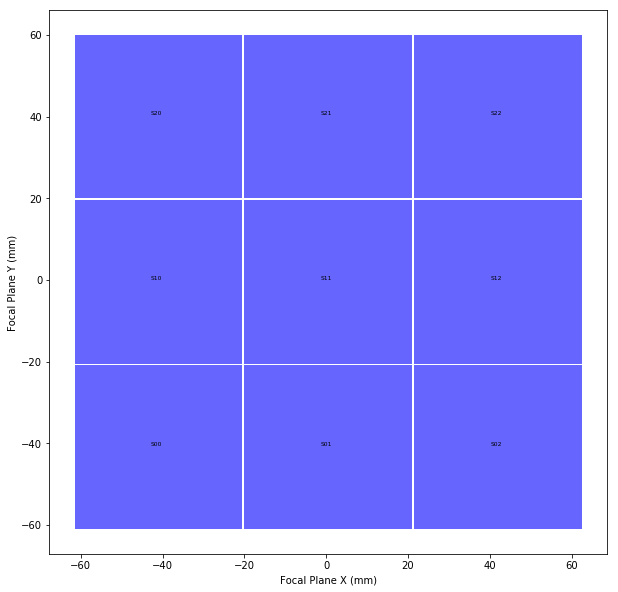

In [7]:
cgUtils.plotFocalPlane(comCam)

## Playground

In [14]:
import lsst.afw.image as afwImage
for ccd in ['S%d%d' % (i, j) for i in range(3) for j in range(3)]:
    print ccd, afwImage.readMetadata(butler.get('raw_filename', dataId, ccd=ccd)[0], 0).toOrderedDict()["LSST_NUM"]

S00 E2V-CCD250-220-Dev
S01 E2V-CCD250-239-Dev
S02 E2V-CCD250-154-Dev
S10 E2V-CCD250-165-Dev
S11 E2V-CCD250-130-Dev
S12 E2V-CCD250-153-Dev
S20 E2V-CCD250-163-Dev
S21 E2V-CCD250-216-Dev
S22 E2V-CCD250-252-Dev


In [17]:
afwImage.readMetadata(butler.get('raw_filename', dataId, ccd=ccd)[0], 0).toOrderedDict()

OrderedDict([(u'SIMPLE', True),
             (u'BITPIX', 8L),
             (u'NAXIS', 0L),
             (u'EXTEND', True),
             (u'DATE', u'2017-05-06T19:50:55.862'),
             (u'DATE-OBS', u'2017-05-06T19:50:37.613'),
             (u'MJD', 57879.827035439666),
             (u'MJD-OBS', 57879.826824224554),
             (u'RUNNUM', u'4947D'),
             (u'IMAGETAG', u'1494100237613'),
             (u'CONTNUM', u'000018910d7f'),
             (u'SEQFILE', u'/home/ts8prod/sequencers/seq-e2v-shorterp-v3.seq'),
             (u'CCD_MANU', u'E2V'),
             (u'CCD_TYPE', u'CCD250'),
             (u'CCD_SERN', u'16013-12-04'),
             (u'LSST_NUM', u'E2V-CCD250-252-Dev'),
             (u'RAFTNAME', u'LCA-11021_RTM-005-Dev'),
             (u'REBNAME', u'R00.Reb2'),
             (u'TESTTYPE', u'LAMBDA'),
             (u'IMGTYPE', u'FLAT'),
             (u'SEQNUM', 2L),
             (u'DETSIZE', u'[1:4096,1:4004]'),
             (u'TEMP_SET', -100.0),
             (u'CCDTE